In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='a0de5f99-0388-41c4-88af-2c4b01bf83a8', project_access_token='p-0570537399dbbb84d46b415d15e56c326ea1077d')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [3]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [4]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [5]:
import pandas as pd

In [6]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_11762540780043438f2403d5ab9fc242 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_XTjiGhTShfZQlZOEfc2sd-7iO8NWZ_g-Pk5S9CgV_kU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_11762540780043438f2403d5ab9fc242.get_object(Bucket='desafio7luiz-donotdelete-pr-eygl3d9j2l3de1',Key='ReceiveDataTNTt.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
0,2019-5-23,Brooklin,-23.6263,-46.6878,27567,43,65,33,14,5,17,24,38,REABASTECER
1,2018-2-24,Campo Belo,-23.6188,-46.6823,26325,74,42,56,7,15,20,34,11,NORMAL
2,2018-3-11,Campo Belo,-23.6188,-46.6823,26829,74,65,58,12,28,11,7,34,NORMAL
3,2019-2-21,Brooklin,-23.6263,-46.6878,26600,86,19,39,10,35,19,9,22,NORMAL
4,2019-2-22,Brooklin,-23.6263,-46.6878,29046,74,16,32,8,29,13,6,16,NORMAL


In [7]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
5452,2019-2-17,Vila Mariana,-23.5895,-46.6346,21832,46,8,40,13,18,32,21,3,REABASTECER
5453,2018-4-26,Tatuapé,-23.5402,-46.5765,68985,86,62,37,29,43,40,29,43,NORMAL
5454,2019-2-28,Vila Mariana,-23.5895,-46.6346,23315,24,65,29,22,18,39,14,4,NORMAL
5455,2019-3-9,Brooklin,-23.6263,-46.6878,30036,63,47,51,39,9,38,20,39,NORMAL
5456,2018-5-20,Tatuapé,-23.5402,-46.5765,69536,40,41,65,27,26,15,29,23,NORMAL


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários do app do BanCoppel:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [8]:
df_training_dataset.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
Tempo           5 non-null object
Estação         5 non-null object
LAT             5 non-null float64
LONG            5 non-null float64
Movimentação    5 non-null int64
Original_473    5 non-null int64
Original_269    5 non-null int64
Zero            5 non-null int64
Maçã-Verde      5 non-null int64
Tangerina       5 non-null int64
Citrus          5 non-null int64
Açaí-Guaraná    5 non-null int64
Pêssego         5 non-null int64
TARGET          5 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 640.0+ bytes


In [9]:
df_training_dataset.nunique()

Tempo            716
Estação           25
LAT               25
LONG              25
Movimentação    4508
Original_473      81
Original_269      65
Zero              63
Maçã-Verde        43
Tangerina         42
Citrus            43
Açaí-Guaraná      42
Pêssego           42
TARGET             2
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

In [10]:
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df_training_dataset.shape[1]))
print("Entradas:\t {}\n".format(df_training_dataset.shape[0]))

Informações Sobre o Dataset
Variáveis:	 14
Entradas:	 5457



In [11]:
# distribuição estatística das variáveis categóricas
df_training_dataset.describe(include='O')

,Tempo,Estação,TARGET
count,5457,5457,5457
unique,716,25,2
top,2019-2-28,Pinheiros,NORMAL
freq,25,434,3653


## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [13]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [14]:
df_training_dataset_imputed.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
5452,2019-2-17,Vila Mariana,-23.5895,-46.6346,21832,46,8,40,13,18,32,21,3,REABASTECER
5453,2018-4-26,Tatuapé,-23.5402,-46.5765,68985,86,62,37,29,43,40,29,43,NORMAL
5454,2019-2-28,Vila Mariana,-23.5895,-46.6346,23315,24,65,29,22,18,39,14,4,NORMAL
5455,2019-3-9,Brooklin,-23.6263,-46.6878,30036,63,47,51,39,9,38,20,39,NORMAL
5456,2018-5-20,Tatuapé,-23.5402,-46.5765,69536,40,41,65,27,26,15,29,23,NORMAL


In [15]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [16]:
df_training_dataset_rmcolumns.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
5452,46,8,40,13,18,32,21,3,REABASTECER
5453,86,62,37,29,43,40,29,43,NORMAL
5454,24,65,29,22,18,39,14,4,NORMAL
5455,63,47,51,39,9,38,20,39,NORMAL
5456,40,41,65,27,26,15,29,23,NORMAL


In [17]:
df_training_dataset_rmcolumns.describe()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
count,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000,5457.000000
mean,46.896647,36.154480,35.712296,24.407916,23.630566,24.343595,23.852117,23.958036
std,25.385119,18.800888,19.400379,12.177812,12.252126,11.984982,12.438704,12.337146
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,20.000000,19.000000,14.000000,13.000000,14.000000,13.000000,13.000000
50%,47.000000,36.000000,36.000000,25.000000,24.000000,24.000000,24.000000,24.000000
75%,68.000000,53.000000,53.000000,35.000000,34.000000,35.000000,35.000000,35.000000
max,86.000000,65.000000,65.000000,43.000000,43.000000,43.000000,43.000000,43.000000


In [18]:
df_training_dataset_rmcolumns['TARGET'].value_counts()

NORMAL         3653
REABASTECER    1804
Name: TARGET, dtype: int64

In [19]:
import seaborn as sns
df_training_dataset_rmcolumns.hist(figsize=(15,10));
sns.set()

In [20]:
df_training_dataset_rmcolumns[['TARGET', 'Original_473']].groupby(['TARGET']).mean()

,Original_473
TARGET,
NORMAL,48.998358
REABASTECER,42.640798


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [21]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
5452,46,8,40,13,18,32,21,3,REABASTECER
5453,86,62,37,29,43,40,29,43,NORMAL
5454,24,65,29,22,18,39,14,4,NORMAL
5455,63,47,51,39,9,38,20,39,NORMAL
5456,40,41,65,27,26,15,29,23,NORMAL


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [22]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [23]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

### Treinando uma árvore de decisão

In [ ]:
# Método para criar um árvore de decisão
#from sklearn.tree import DecisionTreeClassifier

#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

In [ ]:
#from xgboost import XGBClassifier

# instanciando o modelo e treinando o mesmo
#dtc = XGBClassifier(learning_rate=0.01, n_estimators=1000,
#                         max_depth=3, subsample = 0.9,
#                         colsample_bytree = 0.1, gamma=1,
#                         random_state=42)
#dtc.fit(X_train, y_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
dtc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

### Fazendo previsões na amostra de teste

In [26]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'NORMAL' 'NORMAL' ... 'NORMAL' 'NORMAL' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

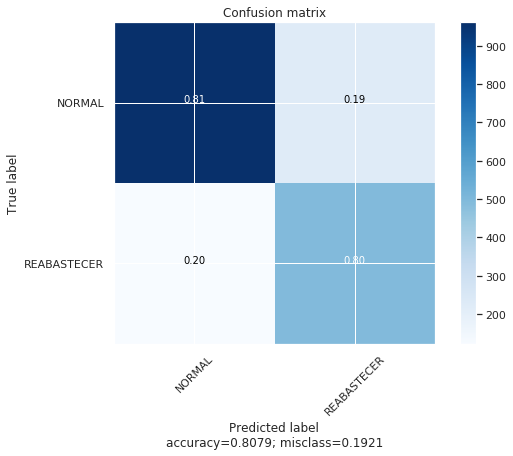

In [28]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [29]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-10 16:15:26--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.1’

    [ <=>                                   ] 70,291      --.-K/s   in 0.002s  

2020-09-10 16:15:27 (32.5 MB/s) - ‘to_be_scored.csv.1’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [30]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [31]:
df_to_be_scored.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
Tempo           5 non-null object
Estação         5 non-null object
LAT             5 non-null float64
LONG            5 non-null float64
Movimentação    5 non-null int64
Original_473    5 non-null int64
Original_269    5 non-null int64
Zero            5 non-null int64
Maçã-Verde      5 non-null int64
Tangerina       5 non-null int64
Citrus          5 non-null int64
Açaí-Guaraná    5 non-null int64
Pêssego         5 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 600.0+ bytes


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [32]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [33]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [34]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [35]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,34,65,28,17,33,27,6,2,REABASTECER
980,21,60,18,15,27,22,43,43,NORMAL
981,9,56,13,14,21,17,37,37,REABASTECER
982,86,49,7,14,17,12,33,33,REABASTECER
983,74,41,65,8,14,7,27,27,NORMAL


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
